In [37]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [39]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [41]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
X_test.shape

(10000, 32, 32, 3)

In [45]:
y_train[:5] # it is a two dimensional array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [47]:
y_train=y_train.reshape(-1,) # converting the two dimensional array into one dimensional array

In [49]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [51]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

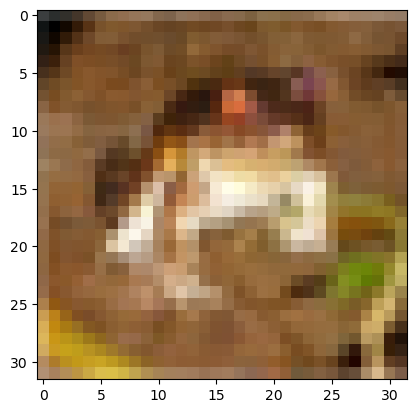

In [53]:
plt.imshow(X_train[0])

In [55]:
# creating a function to print the image of the label according to the index
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

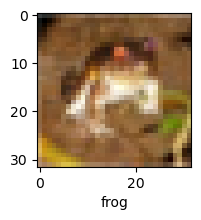

In [57]:
plot_sample(X_train,y_train,0)

In [59]:
# Scaling the values to a range of 0 to 1
X_train=X_train/255
X_test=X_test/255

In [67]:
# We first create a ANN so that as to compare Y CNN is better in terms of image classification by comparing their Accuracy
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)
            

Epoch 1/5
1563/1563 [==============================] - 335s 212ms/step - loss: 1.8939 - accuracy: 0.3258
Epoch 2/5
1563/1563 [==============================] - 329s 210ms/step - loss: 1.6820 - accuracy: 0.3932
Epoch 3/5
1563/1563 [==============================] - 340s 217ms/step - loss: 1.6001 - accuracy: 0.4265
Epoch 4/5
1563/1563 [==============================] - 683s 437ms/step - loss: 1.5414 - accuracy: 0.4483
Epoch 5/5
1563/1563 [==============================] - 227s 145ms/step - loss: 1.5023 - accuracy: 0.4640


In [69]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 20ms/step - loss: 1.5093 - accuracy: 0.4655


[1.509272575378418, 0.46549999713897705]

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report;\n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 6s 19ms/step
classification report;
               precision    recall  f1-score   support

           0       0.57      0.51      0.54      1000
           1       0.54      0.70      0.61      1000
           2       0.34      0.33      0.33      1000
           3       0.32      0.41      0.36      1000
           4       0.49      0.30      0.37      1000
           5       0.42      0.32      0.37      1000
           6       0.38      0.70      0.49      1000
           7       0.63      0.42      0.50      1000
           8       0.58      0.62      0.60      1000
           9       0.60      0.35      0.44      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [77]:
# Now we build our CNN model and check it with ANN in terms of accuracy
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)    
    

Epoch 1/10
1563/1563 [==============================] - 58s 23ms/step - loss: 1.4869 - accuracy: 0.4654
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1538 - accuracy: 0.5949
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0261 - accuracy: 0.6389
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9441 - accuracy: 0.6707
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8832 - accuracy: 0.6934
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8352 - accuracy: 0.7094
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7939 - accuracy: 0.7237
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7572 - accuracy: 0.7356
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7285 - accuracy: 0.7452
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [79]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9607 - accuracy: 0.6814


[0.9606615304946899, 0.6814000010490417]

In [ ]:
# Accuracy of ANN= 0.46 AND Accuracy of CNN= 0.68

In [81]:
y_test=y_test.reshape(-1,)

In [83]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

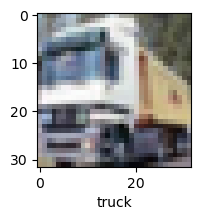

In [86]:
plot_sample(X_train, y_train,1)

In [90]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[2.34221527e-03, 6.98528835e-04, 1.17013534e-03, 9.69384134e-01,
        8.15712556e-05, 1.93146877e-02, 3.27012572e-03, 3.58109362e-04,
        3.09904688e-03, 2.81507644e-04],
       [1.93410702e-02, 4.83743101e-02, 3.71009737e-05, 8.23350729e-06,
        4.85933533e-08, 1.08839902e-06, 6.61812116e-09, 3.94245006e-07,
        9.28833246e-01, 3.40443105e-03],
       [8.71039033e-02, 4.58915085e-01, 6.76932046e-04, 2.53294152e-03,
        5.85597591e-05, 7.21017306e-04, 2.02334536e-06, 3.26759677e-04,
        3.43859553e-01, 1.05803251e-01],
       [9.43831980e-01, 6.29447540e-03, 2.97473487e-03, 1.17530566e-04,
        1.94578301e-04, 4.37473955e-06, 5.73872626e-07, 1.16426818e-04,
        4.64489721e-02, 1.64576668e-05],
       [1.70510193e-05, 5.47891468e-05, 2.87632011e-02, 4.33422811e-02,
        4.54046488e-01, 6.87543210e-03, 4.66439158e-01, 7.04571430e-05,
        3.54502321e-04, 3.66705935e-05]], dtype=float32)

In [92]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5] # predicted values

[3, 8, 1, 0, 6]

In [94]:
y_test[:5] # actual values

array([3, 8, 8, 0, 6], dtype=uint8)

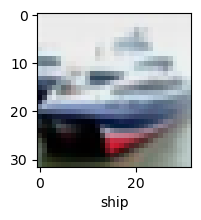

In [96]:
plot_sample(X_test,y_test,1)

In [98]:
classes[y_classes[1]]

'ship'

In [102]:
print("classification report;\n", classification_report(y_test,y_classes))

classification report;
               precision    recall  f1-score   support

           0       0.77      0.65      0.71      1000
           1       0.84      0.77      0.80      1000
           2       0.63      0.55      0.59      1000
           3       0.48      0.56      0.51      1000
           4       0.63      0.63      0.63      1000
           5       0.56      0.64      0.59      1000
           6       0.88      0.62      0.73      1000
           7       0.79      0.68      0.73      1000
           8       0.68      0.89      0.77      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

